# <u>Company attrition</u> 

This is a simulated (fictional) data set for employee attrition at a company and was created by IBM data scientists.

Dataset link: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

I will take a look at the data from a high-level using Python (pandas library) to see the type of data that has been collected, then formulate a question and hypothesis related to employee attrition at this company. Then an exploratory analysis will be conducted using Python and some libraries; numpy and pandas for data cleaning and manipulation, statsmodels for statistical analysis, and seaborn for plotting.

In [1]:
import pandas as pd

df = pd.read_csv('C:\\Users\\Jason\\Desktop\\Bootcamp\\Project 3 python\\archive\\HR-Employee-Attrition.csv') #load the data

In [2]:
pd.set_option('display.max_columns', None) #to see all of the columns at once
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


### METADATA (provided in the dataset)

#### Education
1 : 'Below College',
2 : 'College',
3 : 'Bachelor',
4 : 'Master',
5 : 'Doctor'

#### EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

#### JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

#### JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

#### PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

#### RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

#### WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [3]:
#Checking for na/NaN values
df_nan = df[df.isna().any(axis=1)]
df_nan.shape #no NaN values in our 35 columns

(0, 35)

In [4]:
#Checking for na/Nan values using loc
df_nan2 = df.loc[:, df.isna().any()]
df_nan2 
#no NaN values by this method either

""
0
1
2
3
4
...
1465
1466
1467
1468


## <u>First look at the data</u>

#### This is a very wide table having 35 columns and 1470 rows. The data is formatted rather nicely and has no missing values but I'm not happy with having so many columns with 'string' values as it will make the quantitative statistical analysis difficult to interpret. The values in some of these columns will have to be mapped to numerical values. 

There are a number of columns with redundant or simply unimportant data that should be removed before mapping values or building the smaller subset of tables (see below for 'Dropping unnecessary columns'). Some of these columns include: StandardHours, Over18, EmployeeCount, EmployeeNumber, DailyRate, MonthlyRate

#### Having so many columns in the dataset makes it possible (and overwhelming) to ask a plethora of different questions about the company itself and it's employees in relation to retention. I've decided to break down the original table into smaller tables relevant to a set of factors contributing to employee attrition:

Financial factors: HourlyRate, MonthlyIncome, OverTime, PercentSalaryHike, StockOptionLevel

Job role factors: BusinessTravel, JobRole, PerformanceRating, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, DistanceFromHome

Job satisfaction factors: EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, RelationshipSatisfaction, WorkLifeBalance

#### For the purpose of my analysis I will set a hypothesis that financial factors, specifically PercentSalaryHike and MonthlyRate are most strongly related to employee retention. My reasoning behind this being that employees who have low or no PercentSalaryHike and/or a relatively low MonthlyRate won't feel valued by their company and are more likely to leave their position for another higher paying job.

Which columns are most important to map to numerical values for the purpose of analyzing the data? With my domain knowledge of employee satisfaction at companies I think the following are most important to be mapped for their likely strong correlation to employee attrition:
Attrition(yes/no -> 1/0), BusinessTravel(0/1/2), OverTime(yes/no -> 1/0), JobRole(ad hoc encoding) 

Some units on column variables are questionable (DailyRate:$USD?, DistanceFromHome: km/miles/min?, StandardHours:biweekly amount? 80/week is unrealistic in the real world)
We trust that these columns with questionable units are reported consistently using the same units of measure

In [5]:
#Let's make a copy of the original dataframe to keep the original in tact while we work on mapping values
df1 = df.copy()
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


## <u>Dropping unnecessary columns</u>

#### There are a number of columns that will not be used for the purpose of this analysis due to them not being meaningful enough:

StandardHours (it is 80 for every employee)

Over18 (all rows are 'Yes')

EmployeeCount (all values are 1)

EmployeeNumber (not useful; I can use YearsAtCompany or YearsInCurrentRole for time data) 

Rates - daily, hourly, monthly - will look for a pattern to see if they are useful (see below)

In [6]:
#Inspecting the various income-related factors. There doesn't seem to be any meaningful connection between the 3 rates (hourly
#daily, and monthly). 
df_rates = df1[['DailyRate','HourlyRate','MonthlyRate','MonthlyIncome']]
df_rates

,DailyRate,HourlyRate,MonthlyRate,MonthlyIncome
0,1102,94,19479,5993
1,279,61,24907,5130
2,1373,92,2396,2090
3,1392,56,23159,2909
4,591,40,16632,3468
...,...,...,...,...
1465,884,41,12290,2571
1466,613,42,21457,9991
1467,155,87,5174,6142
1468,1023,63,13243,5390


In [7]:
#We will keep the DailyRate and MonthlyIncome column but drop DailyRate and MonthlyRate as they are redundant
#Let's also get rid of the StandardHours, Over18, EmployeeCount, and EmployeeNumber columns
df1.drop(columns = ['DailyRate', 'MonthlyRate', 'StandardHours', 'Over18', 'EmployeeCount', 'EmployeeNumber'], inplace=True)
df1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,2,No,14,3,4,0,17,3,2,9,6,0,8


## <u>Inspecting columns and mapping strings to numerical values</u>

#### Attrition (Yes/No -> 1/0), 
#### BusinessTravel (0/1/2) 
#### OverTime (yes/no -> 1/0) 
#### JobRole (one hot encoding for each job) 

In [8]:
df1['Attrition'].unique() #Inspecting the 'Attrition' column unique values

array(['Yes', 'No'], dtype=object)

In [9]:
#The Attrition column values are 'Yes' or 'No'. Let's change this to '1' or '0'
value_conversion_attr = {'Yes':1, 'No':0}
df1['Attrition'] = df['Attrition'].map(value_conversion_attr)
df1['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [10]:
#Let's look at the unique values in the BusinessTravel column

df1['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [11]:
#Let's convert 0 to Non-Travel, 1 to Travel_Rarely and 2 to Travel_Frequently

value_conversion_BT = {'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2}

In [12]:
df1['BusinessTravel'] = df1['BusinessTravel'].map(value_conversion_BT) #convert values to numeric
df1['BusinessTravel']

0       1
1       2
2       1
3       2
4       1
       ..
1465    2
1466    1
1467    1
1468    2
1469    1
Name: BusinessTravel, Length: 1470, dtype: int64

In [13]:
df1['OverTime'].unique() #what do we have in the overtime column?

array(['Yes', 'No'], dtype=object)

In [14]:
df1['OverTime'] #what do we have in the overtime column?

0       Yes
1        No
2       Yes
3       Yes
4        No
       ... 
1465     No
1466     No
1467    Yes
1468     No
1469     No
Name: OverTime, Length: 1470, dtype: object

In [15]:
#Let's convert 'Yes' to 1 and 'No' to 0
value_conversion_OT = {'Yes':1, 'No':0}

In [16]:
df1['OverTime'] = df1['OverTime'].map(value_conversion_OT) #map the new values to the df1 OverTime column
df1['OverTime']

0       1
1       0
2       1
3       1
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: OverTime, Length: 1470, dtype: int64

In [17]:
df1['JobRole'].unique()
# There are 9 unique job roles in the company: 'Sales Executive', 'Research Scientist', 'Laboratory Technician',
#        'Manufacturing Director', 'Healthcare Representative', 'Manager',
#        'Sales Representative', 'Research Director', 'Human Resources'
# Using label encoding here will not be reflective of the roles themselves and One Hot Encoding will add 9 extra tables to an 
# already very large data table. Both solutions are not great but One Hot Encoding will provide the most meaningful result.
# I think it makes the most sense to apply the One Hot Encoding after creating the 'Job role factors' subtable

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

## <u>Preliminary exploratory data analysis</u>

In [18]:
#What is the overall attrition rate?

df1['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

##### 19.2% overall attrition rate for the company

In [19]:
#How many employees are in each Job Role?
df1['JobRole'].value_counts() 

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

<AxesSubplot:xlabel='JobRole'>

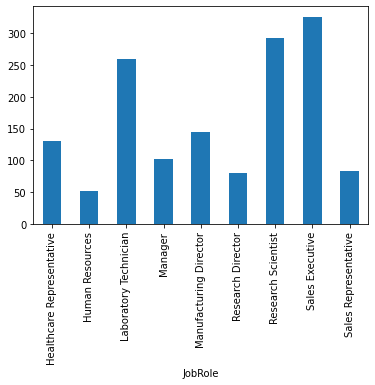

In [20]:
df1.groupby('JobRole').size().plot(kind='bar') #plot as a bar graph

In [21]:
#What is the average and median hourly rate per Job Role?
df1.groupby('JobRole').mean()['HourlyRate'], df1.groupby('JobRole').median()['HourlyRate']


(JobRole
 Healthcare Representative    66.839695
 Human Resources              64.173077
 Laboratory Technician        66.683398
 Manager                      66.833333
 Manufacturing Director       65.006897
 Research Director            63.762500
 Research Scientist           66.708904
 Sales Executive              65.438650
 Sales Representative         64.337349
 Name: HourlyRate, dtype: float64,
 JobRole
 Healthcare Representative    68.0
 Human Resources              58.5
 Laboratory Technician        67.0
 Manager                      68.5
 Manufacturing Director       64.0
 Research Director            60.5
 Research Scientist           67.0
 Sales Executive              66.0
 Sales Representative         65.0
 Name: HourlyRate, dtype: float64)

<AxesSubplot:xlabel='JobRole'>

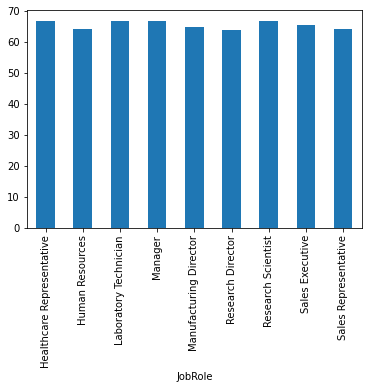

In [22]:
df1.groupby('JobRole').mean()['HourlyRate'].plot(kind='bar') #plot the mean hourly pay for each job role

<AxesSubplot:xlabel='JobRole'>

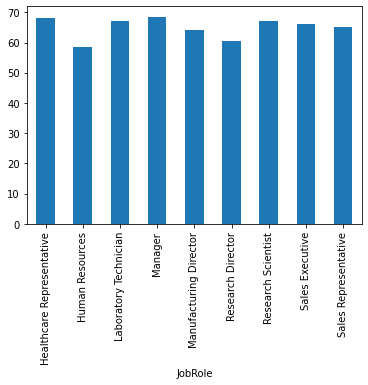

In [23]:
df1.groupby('JobRole').median()['HourlyRate'].plot(kind='bar') #plot the median hourly rate per job role

#### Some strange findings here - the means are very close to eachother and Research Director has the lowest mean and the lowest mode. I would expect a Research Director to make more than a Research Scientist and a Laboratory Technician on average. Perhaps the companies compensation metrics are skewed - this could have an impact on attrition if employees feel they aren't being compensated enough for the job.

In [24]:
#Do some job roles have more attrition than others? More demanding roles? Higher stress levels?

df_jr_attr = df1.groupby('JobRole')['Attrition'].value_counts()
df_jr_attr

JobRole                    Attrition
Healthcare Representative  0            122
                           1              9
Human Resources            0             40
                           1             12
Laboratory Technician      0            197
                           1             62
Manager                    0             97
                           1              5
Manufacturing Director     0            135
                           1             10
Research Director          0             78
                           1              2
Research Scientist         0            245
                           1             47
Sales Executive            0            269
                           1             57
Sales Representative       0             50
                           1             33
Name: Attrition, dtype: int64

#### In what Job Roles have the largest percentage of employees attritioned?

Human Resources : (12/40) = 30.0%

Lab Technician : (62/197) = 31.5%

Research Scientist : (47/245) = 19.2%

Sales Executive : (57/269) = 21.2%

Sales Representative : (33/50) = 66.0%

##### The Sales Representative Job Role has the highest attrition percentage by far at 66.0%, more than 30% higher than Lab Technicians

In [25]:
# Are people reporting a lower WorkLifeBalance score more likely to leave? 

df_wlb_attr = df1.groupby('WorkLifeBalance')['Attrition'].value_counts()

In [26]:
df_wlb_attr

WorkLifeBalance  Attrition
1                0             55
                 1             25
2                0            286
                 1             58
3                0            766
                 1            127
4                0            126
                 1             27
Name: Attrition, dtype: int64

##### Employees reporting 0 for WorkLifeBalance have the highest percent chance to leave the company (25/55 = 45.5%) but this is the lowest reported score. The largest number of employees report a 3 out of 4 on the WorkLifeBalance score

In [27]:
#Are employees more likely to leave if it's been a long time since their last promotion?

df1['YearsSinceLastPromotion'].unique()

array([ 0,  1,  3,  2,  7,  4,  8,  6,  5, 15,  9, 13, 12, 10, 11, 14],
      dtype=int64)

In [28]:
df_yslp_attr = df1.groupby('YearsSinceLastPromotion')['Attrition'].value_counts()
df_yslp_attr

YearsSinceLastPromotion  Attrition
0                        0            471
                         1            110
1                        0            308
                         1             49
2                        0            132
                         1             27
3                        0             43
                         1              9
4                        0             56
                         1              5
5                        0             43
                         1              2
6                        0             26
                         1              6
7                        0             60
                         1             16
8                        0             18
9                        0             13
                         1              4
10                       0              5
                         1              1
11                       0             22
                         1              2

<AxesSubplot:xlabel='YearsSinceLastPromotion'>

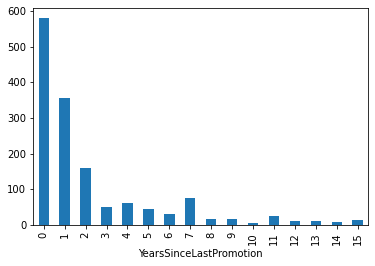

In [29]:
#how does the distribution of years since last promotion look across employees?
df1.groupby('YearsSinceLastPromotion').size().plot(kind='bar') #group, count size, and plot as bar graph

##### There is a larger amount of employee attrition in the first few years since the employee's last promotion. Maybe promoted employees are overwhelmed by the workload in the new position? Maybe there is a high turnover of fresh employees? 

<AxesSubplot:xlabel='StockOptionLevel'>

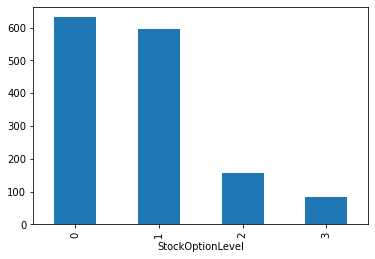

In [30]:
#How are stock options distributed across employees?
df1.groupby('StockOptionLevel').size().plot(kind='bar')

In [31]:
df1['PercentSalaryHike'].unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25],
      dtype=int64)

<AxesSubplot:xlabel='PercentSalaryHike'>

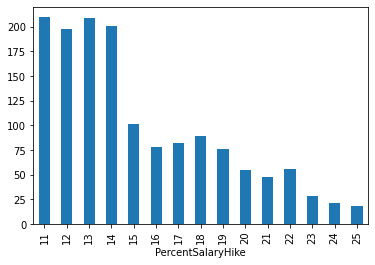

In [32]:
#What type of raises do employees get in the company?
df1.groupby('PercentSalaryHike').size().plot(kind='bar')

##### The most common PercentSalaryHike is between 11-14%

## <u>Creating sub-tables</u>

Financial factors: HourlyRate, MonthlyIncome, OverTime, PercentSalaryHike, StockOptionLevel

Job role factors: BusinessTravel, JobRole, PerformanceRating, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, DistanceFromHome

Job satisfaction factors: EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, RelationshipSatisfaction, WorkLifeBalance

In [33]:
df_fin = df1[['Attrition', 'HourlyRate', 'MonthlyIncome', 'OverTime', 'PercentSalaryHike', 'StockOptionLevel']] #create the subtable for financial factors
df_fin

,Attrition,HourlyRate,MonthlyIncome,OverTime,PercentSalaryHike,StockOptionLevel
0,1,94,5993,1,11,0
1,0,61,5130,0,23,1
2,1,92,2090,1,15,0
3,0,56,2909,1,11,0
4,0,40,3468,0,12,1
...,...,...,...,...,...,...
1465,0,41,2571,0,17,1
1466,0,42,9991,0,15,1
1467,0,87,6142,1,20,1
1468,0,63,5390,0,14,0


In [34]:
df_job_role = df1[['Attrition', 'BusinessTravel', 'DistanceFromHome', 'JobRole', 'PerformanceRating', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']] #create the subtable for job role factors
df_job_role

,Attrition,BusinessTravel,DistanceFromHome,JobRole,PerformanceRating,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,1,1,Sales Executive,3,4,0,5
1,0,2,8,Research Scientist,4,7,1,7
2,1,1,2,Laboratory Technician,3,0,0,0
3,0,2,3,Research Scientist,3,7,3,0
4,0,1,2,Laboratory Technician,3,2,2,2
...,...,...,...,...,...,...,...,...
1465,0,2,23,Laboratory Technician,3,2,0,3
1466,0,1,6,Healthcare Representative,3,7,1,7
1467,0,1,4,Manufacturing Director,4,2,0,3
1468,0,2,2,Sales Executive,3,6,0,8


In [35]:
#Apply the One hot encoding to the JobRole column of the subtable
df_job_roles = pd.get_dummies(df_job_role, columns=["JobRole"]) #create new table with the dummy values

In [36]:
df_job_roles

,Attrition,BusinessTravel,DistanceFromHome,PerformanceRating,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,1,1,1,3,4,0,5,0,0,0,0,0,0,0,1,0
1,0,2,8,4,7,1,7,0,0,0,0,0,0,1,0,0
2,1,1,2,3,0,0,0,0,0,1,0,0,0,0,0,0
3,0,2,3,3,7,3,0,0,0,0,0,0,0,1,0,0
4,0,1,2,3,2,2,2,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,2,23,3,2,0,3,0,0,1,0,0,0,0,0,0
1466,0,1,6,3,7,1,7,1,0,0,0,0,0,0,0,0
1467,0,1,4,4,2,0,3,0,0,0,0,1,0,0,0,0
1468,0,2,2,3,6,0,8,0,0,0,0,0,0,0,1,0


In [37]:
df_job_roles.shape #we have 16 columns now

(1470, 16)

In [38]:
df_job_satisf = df1[['Attrition', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']] #create the table for job satisfaction factors

In [39]:
df_job_satisf

,Attrition,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance
0,1,2,3,4,1,1
1,0,3,2,2,4,3
2,1,4,2,3,2,3
3,0,4,3,3,3,3
4,0,1,3,2,4,3
...,...,...,...,...,...,...
1465,0,3,4,4,3,3
1466,0,4,2,1,1,3
1467,0,2,4,2,2,3
1468,0,4,2,2,4,2


## <u>Statistics - regression analysis</u>

### Financial factors

In [40]:
import numpy as np
import statsmodels.api as sm

df_fin['intercept'] = np.ones((df_fin.shape[0],)) #set the y-intercept column (column of 1's the same length as the # of rows in df_fin)

dependent_vars_fin = df_fin.iloc[:, 0] #first column and all the rows for dependent variables (Attrition column)
independent_vars_fin = df_fin.iloc[:, 1:] #all other columns and all rows for independent variables

<ipython-input-40-197bee580191>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin['intercept'] = np.ones((df_fin.shape[0],)) #set the y-intercept column (column of 1's the same length as the # of rows in df_fin)


In [41]:
independent_vars_fin

,HourlyRate,MonthlyIncome,OverTime,PercentSalaryHike,StockOptionLevel,intercept
0,94,5993,1,11,0,1.0
1,61,5130,0,23,1,1.0
2,92,2090,1,15,0,1.0
3,56,2909,1,11,0,1.0
4,40,3468,0,12,1,1.0
...,...,...,...,...,...,...
1465,41,2571,0,17,1,1.0
1466,42,9991,0,15,1,1.0
1467,87,6142,1,20,1,1.0
1468,63,5390,0,14,0,1.0


### Let's set a level of significance of 0.05 for our p-values before completing our regression analysis

In [42]:
#Running a linear regression model for the financial factors
lin_reg_fin = sm.OLS(dependent_vars_fin, independent_vars_fin) #run an ordinary least squares regression
reg_results_fin = lin_reg_fin.fit() #naming our output from the regression analysis
print(reg_results_fin.summary())

                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     34.49
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           2.06e-33
Time:                        11:45:29   Log-Likelihood:                -533.42
No. Observations:                1470   AIC:                             1079.
Df Residuals:                    1464   BIC:                             1111.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
HourlyRate        -1.396e-05      0.00

##### What do we see: 

#### HourlyRate and PercentSalaryHike have near zero coefficients AND very high p-values indicating low statistical significance to employee attrition

#### Low R^2 value of 1.05

#### Let's focus on dropping HourlyRate and PercentSalaryHike one at a time and re-running the model


In [43]:
independent_vars_fin2 = independent_vars_fin.drop(columns=['HourlyRate']) #drop the HourlyRate column
lin_reg_fin2 = sm.OLS(dependent_vars_fin, independent_vars_fin2)
regression_results_fin2 = lin_reg_fin2.fit()
print(regression_results_fin2.summary())

                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     43.14
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           2.93e-34
Time:                        11:45:29   Log-Likelihood:                -533.42
No. Observations:                1470   AIC:                             1077.
Df Residuals:                    1465   BIC:                             1103.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
MonthlyIncome     -1.258e-05   1.93e-0

#### After dropping the HourlyRate column we see a minor (0.001) increase in the adjusted R^2 value of the model. PercentSalaryHike still has a large p-value (0.531) and the smallest coefficient (-0.0016) so let's drop this column and re-run the model.

In [44]:
independent_vars_fin3 = independent_vars_fin2.drop(columns=['PercentSalaryHike']) #drop the PercentSalaryHike column
lin_reg_fin3 = sm.OLS(dependent_vars_fin, independent_vars_fin3)
regression_results_fin3 = lin_reg_fin3.fit()
print(regression_results_fin3.summary())

                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     57.42
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           4.30e-35
Time:                        11:45:29   Log-Likelihood:                -533.62
No. Observations:                1470   AIC:                             1075.
Df Residuals:                    1466   BIC:                             1096.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
MonthlyIncome    -1.255e-05   1.93e-06  

#### All p-values are now 0 indicating that each coefficient is significant with OverTime appearing to have the most significant effect on attrition.

### <u>Takeaways:</u> 
#### The R^2 value is still very low indicating low statistical significance of this financial model predicting employee attrition. Maybe some of the other factors from the 'job role' and 'job satisfaction' tables will be more significant.
#### The company should monitor and follow-up with employees working overtime to make sure they aren't getting burnt out. Limiting the amount of overtime may also be a valid solution.
#### Interestingly the two financial variables I thought would be most correlated with attrition (HourlyRate and PercentSalaryHike) were the least significant. 

## <u>Job role factors for attrition - Statistical analysis</u>

In [45]:
df_job_roles

,Attrition,BusinessTravel,DistanceFromHome,PerformanceRating,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,1,1,1,3,4,0,5,0,0,0,0,0,0,0,1,0
1,0,2,8,4,7,1,7,0,0,0,0,0,0,1,0,0
2,1,1,2,3,0,0,0,0,0,1,0,0,0,0,0,0
3,0,2,3,3,7,3,0,0,0,0,0,0,0,1,0,0
4,0,1,2,3,2,2,2,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,2,23,3,2,0,3,0,0,1,0,0,0,0,0,0
1466,0,1,6,3,7,1,7,1,0,0,0,0,0,0,0,0
1467,0,1,4,4,2,0,3,0,0,0,0,1,0,0,0,0
1468,0,2,2,3,6,0,8,0,0,0,0,0,0,0,1,0


In [46]:
import numpy as np
import statsmodels.api as sm

df_job_roles['intercept'] = np.ones((df_job_roles.shape[0],)) #set the y-intercept column (column of 1's the same length as the # of rows in df_job_roles)

dependent_vars_JR = df_job_roles.iloc[:, 0] #pull the attrition column for dependent variable
independent_vars_JR = df_job_roles.iloc[:, 1:] #pull all other columns for the independent variables

In [47]:
lin_reg_JR = sm.OLS(dependent_vars_JR, independent_vars_JR) #Running a linear regression model for the job role factors
reg_results_JR = lin_reg_JR.fit() #naming the model
print(reg_results_JR.summary())

                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     11.29
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           5.25e-25
Time:                        11:45:29   Log-Likelihood:                -539.47
No. Observations:                1470   AIC:                             1109.
Df Residuals:                    1455   BIC:                             1188.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Busine

#### Again as with the financial factors we produce a statistical model with a low R^2 value (0.098) and we can see that there are a number of variables with high p-values and low coefficient values: ResearchScientist, PerformanceRating, and to a lesser extent SalesExecutive and HumanResources. We will start by dropping ResearchScientist and PerformanceRating.
#### Most of the variables have a very low coefficient but these have the lowest coefficients: DistanceFromHome, PerformanceRating, YearsWithCurrManager, ResearchScientist.
##### Perhaps the very low coefficient values can be explained by our Dependent Variable only having values of 0 or 1 and most of the independent variables having a narrow numerical range from 0-10. So a change in the independent variables creates such a small numerical change in the dependent variables.
### Our most highly correlated variable (largest coefficient) is SalesRepresentative (0.2066) and we have a number of variables that have a similar absolute coefficient values near 0.1: BusinessTravel, HealthCareRepresentative, HumanResources, LaboratoryTechnician, Manager, ManufacturingDirector, and ResearchDirector

### Let's drop the Research Scientist and PerformanceRating Columns and re-run our statistical model

In [48]:
independent_vars_JR2 = independent_vars_JR.drop(columns=['JobRole_Research Scientist']) #drop column
lin_reg_JR2 = sm.OLS(dependent_vars_JR, independent_vars_JR2)
regression_results_JR2 = lin_reg_JR2.fit()
print(regression_results_JR2.summary())

                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     11.29
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           5.25e-25
Time:                        11:45:29   Log-Likelihood:                -539.47
No. Observations:                1470   AIC:                             1109.
Df Residuals:                    1455   BIC:                             1188.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Busine

#### We can see that PerformanceRating still has the largest P value and a low coefficient so we will drop this column next. The Sales Executive variable's p-value has also increased to 0.267 and it has one of the smallest coefficients. 

In [49]:
independent_vars_JR3 = independent_vars_JR2.drop(columns=['PerformanceRating']) #drop column
lin_reg_JR3 = sm.OLS(dependent_vars_JR, independent_vars_JR3)
regression_results_JR3 = lin_reg_JR3.fit()
print(regression_results_JR3.summary())

                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     12.16
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           1.53e-25
Time:                        11:45:29   Log-Likelihood:                -539.51
No. Observations:                1470   AIC:                             1107.
Df Residuals:                    1456   BIC:                             1181.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Busine

#### Now the SalesExecutive and HumanResources p-values stand out as being insignficant so lets drop those columns and see if our model improves

In [50]:
independent_vars_JR4 = independent_vars_JR3.drop(columns=['JobRole_Sales Executive']) #drop column
lin_reg_JR4 = sm.OLS(dependent_vars_JR, independent_vars_JR4)
regression_results_JR4 = lin_reg_JR4.fit()
print(regression_results_JR4.summary())

                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     13.07
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           7.21e-26
Time:                        11:45:29   Log-Likelihood:                -540.12
No. Observations:                1470   AIC:                             1106.
Df Residuals:                    1457   BIC:                             1175.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Busine

In [51]:
independent_vars_JR5 = independent_vars_JR4.drop(columns=['JobRole_Human Resources']) #drop column
lin_reg_JR5 = sm.OLS(dependent_vars_JR, independent_vars_JR5)
regression_results_JR5 = lin_reg_JR5.fit()
print(regression_results_JR5.summary())

                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     14.15
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           3.27e-26
Time:                        11:45:29   Log-Likelihood:                -540.73
No. Observations:                1470   AIC:                             1105.
Df Residuals:                    1458   BIC:                             1169.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Busine

#### Now all of our p-values are statistically significant but we notice that most of the coefficients are fairly small, the largest of which with positive correlation to attrition is SalesRepresentative, 
#### ResearchDirector, ManufacturingDirector, Manager, and HealthcareRepresentative are the largest statistically significant negatively correlated variables to attrition. Most of these are higher level roles so it's understandable that attrition levels would be lower as employees in these roles will typically be paid more money, have more impact on the business, and be valued more in the company. 
#### The R^2 value for our model is still very low at 0.096 so we can't accurately say that any of these variables are strong predictors of employee attrition.

### Is it possible that our intercept is throwing off our model? Let's check

In [52]:
independent_vars_JR6 = independent_vars_JR5.drop(columns=['intercept']) #drop the intercept column
lin_reg_JR6 = sm.OLS(dependent_vars_JR, independent_vars_JR6)
regression_results_JR6 = lin_reg_JR6.fit()
print(regression_results_JR6.summary())

                                 OLS Regression Results                                
Dep. Variable:              Attrition   R-squared (uncentered):                   0.235
Model:                            OLS   Adj. R-squared (uncentered):              0.229
Method:                 Least Squares   F-statistic:                              40.70
Date:                Tue, 30 Nov 2021   Prob (F-statistic):                    3.61e-77
Time:                        11:45:29   Log-Likelihood:                         -547.78
No. Observations:                1470   AIC:                                      1118.
Df Residuals:                    1459   BIC:                                      1176.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

#### The R^2 value increases from 0.096 to 0.235 when we drop the intercept column but at this level its statistical significance is still very low. With this new analysis without the intercept all of the p-values remain significant with the exception of YearsWithCurrManager which has increased to 0.104.
#### In this case I think it's appropriate to drop the intercept as it improves our overall model without drastically changing the significance level of the variables.

### <u>Job satisfaction factors related to employee attrition</u>

In [53]:
df_job_satisf

,Attrition,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance
0,1,2,3,4,1,1
1,0,3,2,2,4,3
2,1,4,2,3,2,3
3,0,4,3,3,3,3
4,0,1,3,2,4,3
...,...,...,...,...,...,...
1465,0,3,4,4,3,3
1466,0,4,2,1,1,3
1467,0,2,4,2,2,3
1468,0,4,2,2,4,2


In [54]:
import numpy as np
import statsmodels.api as sm

df_job_satisf['intercept'] = np.ones((df_job_satisf.shape[0],)) #set the y-intercept column (column of 1's the same length as the # of rows in df_job_satisf)

dependent_vars_JS = df_job_satisf.iloc[:, 0] #attrition column is our dependent variable
independent_vars_JS = df_job_satisf.iloc[:, 1:] #all other columns are the independent variables

<ipython-input-54-c3c02b3da642>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_job_satisf['intercept'] = np.ones((df_job_satisf.shape[0],)) #set the y-intercept column (column of 1's the same length as the # of rows in df_job_satisf)


In [55]:
lin_reg_JS = sm.OLS(dependent_vars_JS, independent_vars_JS) #Running a linear regression model for the job satisfaction factors
reg_results_JS = lin_reg_JS.fit()
print(reg_results_JS.summary())

                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     13.85
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           3.06e-13
Time:                        11:45:29   Log-Likelihood:                -581.31
No. Observations:                1470   AIC:                             1175.
Df Residuals:                    1464   BIC:                             1206.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
EnvironmentSatisfaction 

#### All p-values are statistically significant (<0.05) except for RelationshipSatisfaction (0.112) so let's drop this column and run the model again


In [56]:
df_job_satisf

,Attrition,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,intercept
0,1,2,3,4,1,1,1.0
1,0,3,2,2,4,3,1.0
2,1,4,2,3,2,3,1.0
3,0,4,3,3,3,3,1.0
4,0,1,3,2,4,3,1.0
...,...,...,...,...,...,...,...
1465,0,3,4,4,3,3,1.0
1466,0,4,2,1,1,3,1.0
1467,0,2,4,2,2,3,1.0
1468,0,4,2,2,4,2,1.0


In [57]:
independent_vars_JS2 = independent_vars_JS.drop(columns=['RelationshipSatisfaction']) #drop column
lin_reg_JS2 = sm.OLS(dependent_vars_JS, independent_vars_JS2)
regression_results_JS2 = lin_reg_JS2.fit()
print(regression_results_JS2.summary())

                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     16.66
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           2.32e-13
Time:                        11:45:29   Log-Likelihood:                -582.58
No. Observations:                1470   AIC:                             1175.
Df Residuals:                    1465   BIC:                             1202.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
EnvironmentSatisfaction   

#### Now the p-values are all statistically significant. All of the coefficients are negatively correlated with attrition (as they increase attrition decreases). The largest coefficient is JobInvolvement which indicates that people who are more involved in their jobs tend to have a lower probability of leaving the company

#### How does the job satisfaction model change if we drop the intercept column?

In [58]:
independent_vars_JS3 = independent_vars_JS2.drop(columns=['intercept']) #drop intercept column
lin_reg_JS3 = sm.OLS(dependent_vars_JS, independent_vars_JS3)
regression_results_JS3 = lin_reg_JS3.fit()
print(regression_results_JS3.summary())

                                 OLS Regression Results                                
Dep. Variable:              Attrition   R-squared (uncentered):                   0.141
Model:                            OLS   Adj. R-squared (uncentered):              0.138
Method:                 Least Squares   F-statistic:                              60.08
Date:                Tue, 30 Nov 2021   Prob (F-statistic):                    4.94e-47
Time:                        11:45:29   Log-Likelihood:                         -632.92
No. Observations:                1470   AIC:                                      1274.
Df Residuals:                    1466   BIC:                                      1295.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

#### Similar to when we dropped the intercept in the Job Role statistical analysis our R^2 value increases  (0.044 to 0.141 in this case) but in this case the P-values all increased to above our statstically relevant level of 0.05. In this case I don't think it was wise to drop the intercept because although it increased our R^2 value our variables are no longer statistically significant.

### <u>Job satisfaction Takeaways:</u>
#### All of the job satisfaction factors are negatively correlated with employee attrition. Thus finding ways to improve these factors for employees should lead to lower levels of attrition. We can't say this with confidence though because our R^2 is so low at 0.044.
#### EnvironmentSatisfaction, JobSatisfaction, and WorkLifeBalance are statistically significant negative correlates to attrition and they have approximately the same coefficient values. 
#### JobInvolvement is the strongest correlate to attrition levels; The company should look for ways to promote higher levels of job involvement such as incentives for the completion of projects or creating a more collaborative space where teammates work together

## <u>Data visualization with Seaborn</u>

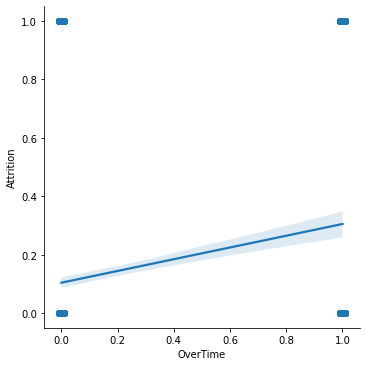

In [59]:
import seaborn as sns

sns.lmplot(x="OverTime", y="Attrition", data=df_fin, ++) #plot overtime vs attrition

#### Both the independent variable OverTime and dependent variable Attrition are discrete variables with only 0 or 1 as the possible values. This makes a confusing and hard to interpret plot. We can't see each datapoint (even with jitter added) but the best fit line tells us that as overtime increases the attrition level also increases; a positively correlated relationship.

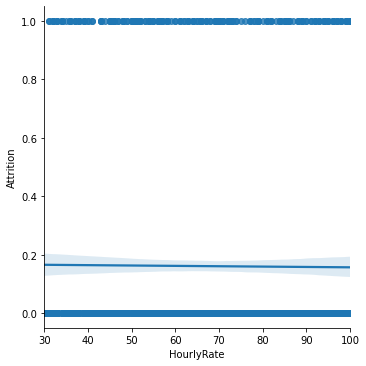

In [60]:
sns.lmplot(x="HourlyRate", y="Attrition", data=df_fin) #ploy hourlyrate and attrition

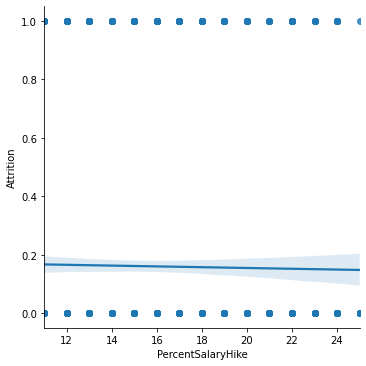

In [61]:
sns.lmplot(x="PercentSalaryHike", y="Attrition", data=df_fin) #plot percentsalaryhike and attrition

#### The above two plots are showing the original hypothesis variables of HourlyRate and PercentSalaryHike. Looking at the regression lines we can see why these variables had such low statistical significance in our analysis; there is little to no change in attrition as HourlyRate or PercentSalaryHike increase which is contrary to my initial predictions.

### How are the attrition levels for employees working in the sales representative job role?

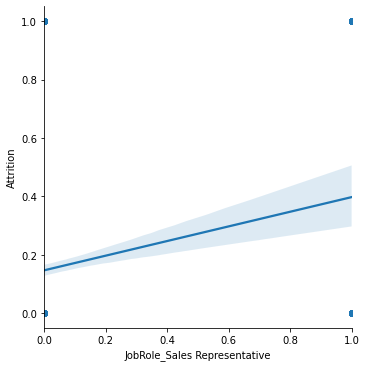

In [62]:
sns.lmplot(x="JobRole_Sales Representative", y="Attrition", data=df_job_roles) #plot attrition for sales reps

#### Plotting data where the dependent variable is discrete and only has two possible values (Attrition = 1 or 0, yes or no) makes graphs that are hard to interpret and extract meaning from the datapoints themselves. The trendline of lmplot is useful to see the relationship between the variables - here we see a significant increase in attrition for those in the sales representative role.

### How is the distance to work related to attrition?

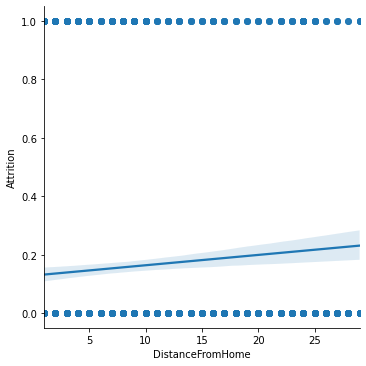

In [63]:
sns.lmplot(x="DistanceFromHome", y="Attrition", data=df_job_role) #plot attrition and distance from home

#### We see a positive correlation between the two variables showing that attrition levels are higher among employees who travel further to get to work.

### How is job satisfaction related to the number of years in the current role?

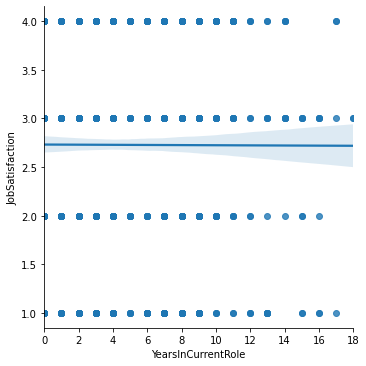

In [64]:
import seaborn as sns
sns.lmplot(x="YearsInCurrentRole", y="JobSatisfaction", data=df) #plot years in current role and job satisfaction

#### There is no significant change in job satisfaction as the number of years in the employee's current role increases.

## <u>Overall takeaways:</u>

#### The original hypothesis of financial factors, specifically HourlyRate and PercentSalaryHike, being the strongest correlates to employee attrition was disproven through the statistical and visual analysis. In fact these two variables were among the least significant variables for explaining attrition. It turns out that at this company the independent variables of OverTime and the SalesRepresentative job role have the strongest correlation to employee attrition levels.

#### Comparing the 3 statistical models and their independent variable coefficients it is clear that the Job Role independent variables overall have a stronger relationship to attrition, especially the specific job in which the employee works. Employees in roles such as ResearchDirector, ManufacturingDirector, Manager, and HealthcareRepresentative are much less likely to leave the company (negative correlation coefficients) whereas sales representatives and laboratory technician job roles are positively correlated to employee attrition.

#### Each of the three models produced very weak R^2 values so we conclude that our models don't accurately predict employee attrition. But of the 3 final regression models with intercepts included the Financial Factors had the highest R^2 value (0.105) but the others weren't far behind (JobRole at 0.096 and JobSatisfaction at 0.044). After dropping the intercept column in the JobRole analysis the R^2 increased to 0.235. It's worth noting that the Financial Factors table had much fewer variables than the other two tables which could help to explain the larger R^2.

#### Dataset limitations: Doing statistical analysis on a discrete dependent variable that only has one of two (Attrition=yes/no=1/0) values may be an explanation for why we had such small R^2 values in each of our models. It makes it difficult to determine why employees are leaving if we don't have more historical data about each employee.

#### Despite the low R^2 values for each subtable we still had statistically significant p-values for our coefficients which indicates that the independent variables still have an influence on attrition. 

#### Largest coefficient related to attrition: JobRole_SalesRepresentative at 0.215 after removing the intercept. This indicates that people working in the sales representative role have a higher likelihood of leaving the company than other roles and even when compared to other financial or job satisfaction factors.




## <u>Recommendations for the company:</u> 

#### OverTime was a strong predictor of attrition so the company should monitor and follow-up with employees working overtime to make sure they aren't getting burnt out. Another possible solution is to limit the amount of overtime employees are allowed to work.

#### In the exploratory analysis it was presented that there was a 60% attrition rate for sales representatives and the statistical analysis confirmed this; it showed that this role, out of all job roles, was the one most highly linked to attrition of employees. The company should investigate why the sales representative role is so strongly linked to attrition - is it because it's a commission based role in a struggling market? Is it harder for new employees in the role to earn a decent paycheck? Performing exit interviews and asking the employee for the reason(s) they are leaving would be valuable information for increasing employee retention in this role.

#### Most of this data seems to be collected by surveys. I think it would benefit the business to gather this information on a more frequent basis which would provide historical data for each employee to see their changes over time. This would make the analysis more robust and easier to draw stronger conclusions as to why employees are leaving the company.

### <u>Notes:</u>

#### Simulated data is often used by researchers and analysts to create a close approximation to real world data. Why use simulated data? It can protect the privacy of individuals, is easier to scale, and is quicker and easier to create than collecting real world data. Where is simulated data used? It's being used more often in machine learning applications as a training set, especially for computer vision tasks.

#### Attrition without historical data - cant see what changed to make the employee decide to leave. Did they start a new role and not like it? Did they move to a new location further from the office? Did they start working more overtime? These are important questions that we can't accurately answer with this dataset because we can't see trends per employee.

#### Linear regression modelling is much better for data having at least one continuous variable in the analysis.

#### If doing this assignment again I would've chose a different question to ask of the data such as: How is an employee's job satisfaction related to the financial factors of the job such as their income and percent salary hike? Or relating job satisfaction to other job factors such as work life balance and distance to work.



### <u>References</u>
Juno Data Analytics Bootcamp Notes - Data analysis with Pandas

Juno Data Analytics Bootcamp Notes - Seaborn - Data Visualization in Python

https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/

https://statisticsbyjim.com/regression/interpret-r-squared-regression/

https://www.datagen.tech/simulated-data-is-synthetic-data/